In [65]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import latexify as lt
#LOSO Validation
loo = LeaveOneOut()
n95_param = []
cloth_param = []

N95 Mask Only

In [66]:
#FEV1
X = np.array([[1.2760928172702], [0.810441832084594], [1.33017339061621], [1.08375787094667]])
y = np.array([3.33, 2.96, 3.65, 2.88])
loo.get_n_splits(X)
print("Running Regression on FEV1")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
n95_param.append(mse) 


#FVC
X = np.array([[1.4654050908903], [1.14809342469465], [1.50890014809364], [1.35394249483054]])
y = np.array([4.33, 3.39, 4.24, 3.39])
loo.get_n_splits(X)
print("Running Regression on FVC")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
n95_param.append(mse) 


#PEF 1 1 2
X = np.array([[8.13715552353243], [8.02829254594798], [8.03627390234917]])
y = np.array([6.05, 7.79, 7.68])
loo.get_n_splits(X)
print("Running Regression on PEF")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
n95_param.append(mse) 

Running Regression on FEV1
TRAIN: [1 2 3] TEST: [0]
Predicted FEV1=  [3.42466992]
True FEV1 =  [3.33]
MSE =  0.008962393913860445


TRAIN: [0 2 3] TEST: [1]
Predicted FEV1=  [2.06264502]
True FEV1 =  [2.96]
MSE =  0.8052459511649152


TRAIN: [0 1 3] TEST: [2]
Predicted FEV1=  [3.25388594]
True FEV1 =  [3.65]
MSE =  0.1569063490473335


TRAIN: [0 1 2] TEST: [3]
Predicted FEV1=  [3.25162182]
True FEV1 =  [2.88]
MSE =  0.13810278056618452


Running Regression on FVC
TRAIN: [1 2 3] TEST: [0]
Predicted FVC=  [3.95976005]
True FVC =  [4.33]
MSE =  0.1370776234137522


TRAIN: [0 2 3] TEST: [1]
Predicted FVC=  [2.19867681]
True FVC =  [3.39]
MSE =  1.4192509388048096


TRAIN: [0 1 3] TEST: [2]
Predicted FVC=  [4.18657201]
True FVC =  [4.24]
MSE =  0.002854550587927649


TRAIN: [0 1 2] TEST: [3]
Predicted FVC=  [3.93453006]
True FVC =  [3.39]
MSE =  0.296512984771919


Running Regression on PEF
TRAIN: [1 2] TEST: [0]
Predicted PEF=  [6.28963754]
True PEF =  [6.05]
MSE =  0.05742614997283175


T

Cloth Mask

In [69]:
#FEV1
X = np.array([[0.520256638695422], [0.802608583398676], [0.845104970586554], [1.12584556470624]])
y = np.array([3.33, 2.96, 3.65, 2.88])
loo.get_n_splits(X)
print("Running Regression on FEV1")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
cloth_param.append(mse) 


#FVC
X = np.array([[0.827315090995639], [1.14152129692972], [1.04271365939278], [1.40124012345122]])
y = np.array([4.33, 3.39, 4.24, 3.3])
loo.get_n_splits(X)
print("Running Regression on FVC")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
cloth_param.append(mse) 



#PEF 
X = np.array([[8.31806643614397], [9.098970377869]])
y = np.array([7.53, 7.68])
loo.get_n_splits(X)
print("Running Regression on PEF")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
cloth_param.append(mse) 

Running Regression on FEV1
TRAIN: [1 2 3] TEST: [0]
Predicted FEV1=  [3.62788169]
True FEV1 =  [3.33]
MSE =  0.08873350173261818


TRAIN: [0 2 3] TEST: [1]
Predicted FEV1=  [3.30607079]
True FEV1 =  [2.96]
MSE =  0.11976499135698603


TRAIN: [0 1 3] TEST: [2]
Predicted FEV1=  [3.03555862]
True FEV1 =  [3.65]
MSE =  0.3775382060536809


TRAIN: [0 1 2] TEST: [3]
Predicted FEV1=  [3.37541856]
True FEV1 =  [2.88]
MSE =  0.2454395479764234


Running Regression on FVC
TRAIN: [1 2 3] TEST: [0]
Predicted FVC=  [4.43776518]
True FVC =  [4.33]
MSE =  0.011613335057665024


TRAIN: [0 2 3] TEST: [1]
Predicted FVC=  [3.86066183]
True FVC =  [3.39]
MSE =  0.22152255642392302


TRAIN: [0 1 3] TEST: [2]
Predicted FVC=  [3.82139885]
True FVC =  [4.24]
MSE =  0.17522692018644484


TRAIN: [0 1 2] TEST: [3]
Predicted FVC=  [2.9636508]
True FVC =  [3.3]
MSE =  0.113130787003799


Running Regression on PEF
TRAIN: [1] TEST: [0]
Predicted PEF=  [7.68]
True PEF =  [7.53]
MSE =  0.02249999999999984


TRAIN: [0]

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<AxesSubplot:title={'center':'Mean Absoule Error For Differnet Type of Mask'}, ylabel='MAE'>

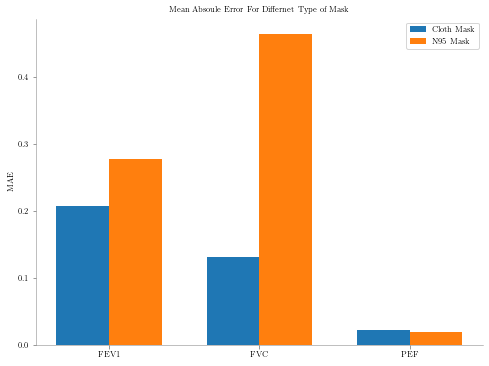

In [70]:
lt.latexify()
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, cloth_param, width, label='Cloth Mask')
rects2 = ax.bar(x + width/2, n95_param, width, label='N95 Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('Mean Absoule Error For Differnet Type of Mask')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
lt.format_axes(ax)